Chapter 14: Deep Computer Vision using Convolutional Neural Networks

Chapter 14 exercises:

1. What are the advantages of CNN over a fully connected DNN for image classification?

-> DNN works on smaller images, but breaks down on large images due to the number of parameters. Since CNNs are only partially connected, they use far fewer parameters so the can be used on larger images, train faster, and require less training data.  
-> DNNs learn images only at fixed locations wheres as FCN (Fully Convolutional Networks) types of CNN can work with images of any size and detect the object anywhere in the image.
-> DNN converts 2D images to 1D arrays which results in losing spatial relationships needed for image processing while CNN can preserve the spatial relationships

page 481: 
Deep Neural Networks (DNNs) vs Convolutional Neural Networks (CNMs) for image recognition
  - DNNs work fine for small images (e.g. MNIST), but it breaks down for large images because of the huge number of parameters. Example: If 100 x 100 pixel image has 10K pixels, and if the 1st layer has just 1000 neurons (which already severely restricts the amount of information), this means 10M connections.
  - CNN solves this problem using partially connected layers and weight sharing

page 525 - 526:
Fully Convolutional Networks (FCNs)
  - fully convolutional network (FCN) is faster may to slide a CNN across an image
  - introduced in 2015 for semantic segmentation (the task of classifying every pixel in an image according to
    to class of the object it belongs to
  - A fully convolutional neural network (FCN) is a special type of CNN that only contains convolutional layers. As a 
    result of using only convolutional layers, FCNs can work with input images of any size, while standard CNNs only accept 
    fixed-size images.
  - an FCN contains only convolutional layers (and pooling layers, which have teh same property), it can be trained
    and executed on images of any size
  - you can replace the dense layers  at the top of a CNN with convolutional layers

https://www.jeremyjordan.me/convolutional-neural-networks/
we lose a great deal of information about the picture when we convert the 2D array of pixel values into a vector; specifically, we lose the spatial relationships within the data.

__book answer:__
1. These are the main advantages of a CNN over a fully connected DNN for image classification:
    * Because consecutive layers are only partially connected and because it heavily reuses its weights, a CNN has many fewer parameters than a fully connected DNN, which makes it much faster to train, reduces the risk of overfitting, and requires much less training data.
    * When a CNN has learned a kernel that can detect a particular feature, it can detect that feature anywhere in the image. In contrast, when a DNN learns a feature in one location, it can detect it only in that particular location. Since images typically have very repetitive features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples.
    * Finally, a DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close. A CNN's architecture embeds this prior knowledge. Lower layers typically identify features in small areas of the images, while higher layers combine the lower-level features into larger features. This works well with most natural images, giving CNNs a decisive head start compared to DNNs.

2. Consider a CNN composed of three convolutional layers, each with 3 x 3 kernel, a stride of 2, and "same" padding. The lowest layer outputs 100 features maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 x 300 pixels:
2a. What is the total number of parameters in the CNN?
2b. If we are using 32-bits floats, at least how much RAM will this network require when making a prediction for a single instance?
2c. What about when training on a mini-batch of 50 images?

-> What is the total number of parameters in the CNN?

layer1: parameters per feature map: 3 x 3 kernels x RBG (3 input channels) + 1 bias = 28; 100 layer1 feature maps x 28 = 2800 parameters 
layer2: parameters per feature map: 3 x 3 kernels x layer1 channels (100 input channels from layer1) + 1 bias = 901; 200 layer2 feature maps x 901 = 180,200 parameters 
layer3: parameters per feature map: 3 x 3 kernels x layer2 channels (200 input channels from layer2) + 1 bias = 1801; 400 layer3 feature maps x 1801 = 720,400 parameters 
total parameters: 2800 + 180,200 + 720,400 = 903,400

-> If we are using 32-bits floats, at least how much RAM will this network require when making a prediction for a single instance?

First, compute feature map size for each layer:

layer1 feature map size: with stride 2 and padding, layer1 feature map size equals 1/2 input pixel size (200 x 300 pixels) = 100 x 150
layer2 feature map size: with stride 2 and padding, layer2 feature map size equals 1/2 layer1 feature map size (100 x 150 pixels) = 50 x 75
layer3 feature map size: with stride 2 and padding, layer3 feature map size equals 1/2 layer2 feature map size (50 x 75 pixels) = 25 x 38 (37.5 round up)

Next, calculate bytes per layer (where there are 4 bytes in each 32-bits):
layer1 bytes: 4 × layer feature map size (100 × 150) × layer1 feature maps (100) = 6 million bytes (6 MB).
layer2 bytes: 4 × layer feature map size (50 ×   75) × layer2 feature maps (200) = 3 million bytes (3 MB).
layer3 bytes: 4 × layer feature map size (25 ×   38) × layer3 feature maps (400) = 1.52 million bytes (1.52 MB).

Memory needed For predictions/inference: 

Note: During inference, the RAM ocuppied by one layer can be released as soon as the next layer has been computed, son you only need as RAM as required by by two consecutive layers:
Max RAM needed by 2 consective layers: 6MB + 3MB = 9MB
Memory required by parameters: 903,400 parameters x 4 bytes/32-bits = 3.6136 NB 
Total prediction memory (at least): 9 MB (max for 2 consective layers) + 3.6 MB (parameter memory) = 12.6 MB

-> What about when training on a mini-batch of 50 images?

Note: The reverse pass of backpropagation requires all the intermediate values computed during the forward pass. Thus, the training memory required is memory needed for a full instance times mini-batch size.

Full training memory:  all layers memory (6 MB (layer1)+ 3 MB (layer2) + 1.52 MB (layer3) x 50 instances) plus imput image memory (200 x 300 (pixels) x 3 (RBG) x 4 bytes/32-bits x 50 images)  plus parameter memory (3.6 MB)=  525 MB (all layers for 50 instances) + 36 MB (50 input images) + 3.6 MB (parameter meter) plus gradient memory = 564.6 MB + ?? gradient RAM

pages 490 - 491:
RAM requirements:
  - convolutional layers require a huge amount of RAM especially during training because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass
  training example:
    - convolutional layer with 200 5 x 5 filters, and stride=1, and padding='same'
    - input:  150 x 100 RGB image (3 channels)
    then:
    - number of parameters:    (5 x 5 x 3 + 1) x 200 = 15200 (the +1 is for bias terms)
    - 200 feature maps comtain 150 x 100 neurons and each neuron needs to computed a weighted sum of its 5 x 5 x 3 = 75 inputs which is 225M float multiplications [200 x 75 x 150 x 100 = 225M]
    - if using 32-bit, convolutional layer output will occupy [200 x 150 x 100 x 32] 96M bits (12MB) of RAM for just 1 instance. if training a batch of 100 instances, then this layer will use up to 1.2GB of RAM
  inference:
    - during inference, the RAM ocuppied by one layer can be released as soon as the next layer has been computed, so you only need as RAM as required by by two consecutive layers
  
  Reducing training memory options:
  
    - reduce mini-batch size, reducing dimensionality using a stride, removing a few layers, using 16-bit floats instead of 32-bit, or distributing the CNN across multiple devices


__book answer:__

2. Let's compute how many parameters the CNN has.
    * Since its first convolutional layer has 3 × 3 kernels, and the input has three channels (red, green, and blue), each feature map has 3 × 3 × 3 weights, plus a bias term. That's 28 parameters per feature map. Since this first convolutional layer has 100 feature maps, it has a total of 2,800 parameters. The second convolutional layer has 3 × 3 kernels and its input is the set of 100 feature maps of the previous layer, so each feature map has 3 × 3 × 100 = 900 weights, plus a bias term. Since it has 200 feature maps, this layer has 901 × 200 = 180,200 parameters. Finally, the third and last convolutional layer also has 3 × 3 kernels, and its input is the set of 200 feature maps of the previous layers, so each feature map has 3 × 3 × 200 = 1,800 weights, plus a bias term. Since it has 400 feature maps, this layer has a total of 1,801 × 400 = 720,400 parameters. All in all, the CNN has 2,800 + 180,200 + 720,400 =  903,400 parameters.<br/>
    * Now let's compute how much RAM this neural network will require (at least) when making a prediction for a single instance. First let's compute the feature map size for each layer. Since we are using a stride of 2 and `"same"` padding, the horizontal and vertical dimensions of the feature maps are divided by 2 at each layer (rounding up if necessary). So, as the input channels are 200 × 300 pixels, the first layer's feature maps are 100 × 150, the second layer's feature maps are 50 × 75, and the third layer's feature maps are 25 × 38. Since 32 bits is 4 bytes and the first convolutional layer has 100 feature maps, this first layer takes up 4 × 100 × 150 × 100 = 6 million bytes (6 MB). The second layer takes up 4 × 50 × 75 × 200 = 3 million bytes (3 MB). Finally, the third layer takes up 4 × 25 × 38 × 400 = 1,520,000 bytes (about 1.5 MB). However, once a layer has been computed, the memory occupied by the previous layer can be released, so if everything is well optimized, only 6 + 3 = 9 million bytes (9 MB) of RAM will be required (when the second layer has just been computed, but the memory occupied by the first layer has not been released yet). But wait, you also need to add the memory occupied by the CNN's parameters! We computed earlier that it has 903,400 parameters, each using up 4 bytes, so this adds 3,613,600 bytes (about 3.6 MB). The total RAM required is therefore (at least) 12,613,600 bytes (about 12.6 MB).<br/>
    * Lastly, let's compute the minimum amount of RAM required when training the CNN on a mini-batch of 50 images. During training TensorFlow uses backpropagation, which requires keeping all values computed during the forward pass until the reverse pass begins. So we must compute the total RAM required by all layers for a single instance and multiply that by 50. At this point, let's start counting in megabytes rather than bytes. We computed before that the three layers require respectively 6, 3, and 1.5 MB for each instance. That's a total of 10.5 MB per instance, so for 50 instances the total RAM required is 525 MB. Add to that the RAM required by the input images, which is 50 × 4 × 200 × 300 × 3 = 36 million bytes (36 MB), plus the RAM required for the model parameters, which is about 3.6 MB (computed earlier), plus some RAM for the gradients (we will neglect this since it can be released gradually as backpropagation goes down the layers during the reverse pass). We are up to a total of roughly 525 + 36 + 3.6 = 564.6 MB, and that's really an optimistic bare minimum.

In [2]:
import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([200, 300]), kernel_size=3, strides=2, padding="same")

(array([100, 150]), array([1, 1]))

3. If your GPU runs out of memory while training CNN, what are five things you could try to solve the problem?

-> reduce mini-batch size, reducing dimensionality using a stride in one or more layers, remove a few layers, using 16-bit floats instead of 32-bit, or distributing the CNN across multiple devices


page 491:
Reducing training memory options:
- reduce mini-batch size, reducing dimensionality using a stride, removing a few layers, using 16-bit floats instead of 32-bit, or distributing the CNN across multiple devices

__book answer:__

3. If your GPU runs out of memory while training a CNN, here are five things you could try to solve the problem (other than purchasing a GPU with more RAM):
    * Reduce the mini-batch size.
    * Reduce dimensionality using a larger stride in one or more layers.
    * Remove one or more layers.
    * Use 16-bit floats instead of 32-bit floats.
    * Distribute the CNN across multiple devices.

4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

-> pooling layer goal is to 'subsample' (i.e. shrink) the input image in order to reduce the computational load, memory usages, and the number of parameters (thereby limiting the risk of overfitting; pooling layer does NOT have weights; all it does is aggregate the inputs using an aggregation function such as max or mean

pages 491 - 493:
Pooling Layers:
  - pooling layer goal is to 'subsample' (i.e. shrink) the input image in order to reduce the computational load, memory usages, and the number of parameters (thereby limiting the risk of overfitting)
  - you define the pooling layers size, the stride, and padding type
  - it does NOT have weights; all it does is aggregate the inputs using an aggregation function such as max or mean
  max pooling layer:
    - most common pooling layer type
    - only the max input value in the receptive field makes it to the next layer, while other inputs are dropped
    - typically works on every input channel independently, so the output depth (i.e. number of channels) is the same as the input depth
    max pooling layer invariance:
      - introduces some level of 'invariance' to small translations as shown in Figure 14-10 (page 493)
      - inserting a max pooling layer every few layers in a CNN, it is possible to get some level of 'translation invariance at layre scale
      - offers a small amount of 'rotational invariance' and slight 'scale invariance'
      - the goal in many cases is 'equivariance' not 'invariance': a small change to the inputs should lead to a corresponding small change in the outputs

__book answer:__

 A max pooling layer has no parameters at all, whereas a convolutional layer has quite a few (see the previous questions).


5. When would you want to add a local response normalization layer?

-> A Local Response Normalization Layer encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization 

page 501:
Local Response normalization (LRN):
  - [AlexNet architecture] uses competitive normalization step immediately after the ReLU step of Convolutional layers C1 & C2 (see table 14-2 [page 499]) called Local Response Normalization
  - this encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization 
  - Equation 14.2. Local response normalization (LRN) shows how to apply (page 500)

__book answer:__

A local response normalization layer makes the neurons that most strongly activate inhibit neurons at the same location but in neighboring feature maps, which encourages different feature maps to specialize and pushes them apart, forcing them to explore a wider range of features. It is typically used in the lower layers to have a larger pool of low-level features that the upper layers can build upon.

6. Can you name the main innovations in AlexNet, as compared to LeNet-5? What about the main innovations in GoogleNet, ResNet, SENet, Xception, and EfficientNet?

-> AlexNet innotation compared to LeNet-5: AlexNet is larger and deeper than LeNet-5 and AlexNet was the first to stack convolutional layers directly on top of another one instead of stacking a pooling layer on top of each convolutional layer

-> GoogleNet performance came in large part from the fact that the network was much deeper that previous CNNs (e.g. AlexNet). This was made possible by 'subnetworks' called 'inception modules' which allow GoogleNet to use parameters more efficiently that previous architectures (has 10 times fewer parameters than AlexNet (~6M instead of ~60M)

-> ResNet showed it was possible to have very deep neural networks (100+ layers). The key to being able to train such a deep network is to use 'skip connections': the signal feeding into a layers is also added to the output of a layer located higher in the stack

-> SENet boost comes from SENets adding a small neural network called 'SE Block' to every inception module or 'residual unit' in the original architecture. An 'SE Block' is composed of a Global Pooling layers followed by dense layer using ReLU activation function and than a dense layer using an sigmoid activation function. A 'SE Block' analyzes the output of the unit is attached to, focusing exculsively on the depth dimension (does not look at any spatial patterns), and learns which features are most active together. It then uses this information to recalibrate the feature maps

-> Xception's main innovation was the use of depthwise separable convolutional layers, which look at spatial patterns and depthwise patterns separately. 

-> EfficientNet's main innotation was the compound scaling method, to efficiently scale a model to a larger compute budget.

page 499: AlexNet-5 architecture:
  - see Table 14-2. AlexNet-5 architecture (page 498)
  - similar to LeNet-5, except only larger and deeper
  - first to stack convolutional layers directly on top of another one instead of stacking a pooling layer on top of each convolutional layer

page 502 - 503: GoogleNet
  - its performance came in large part from the fact that the network was much deeper that previous CNNs
  - this was made possible by 'subnetworks' called 'inception modules' which allow GoogleNet to use parameters more efficiently that previous architectures (has 10 times fewer parameters than AlexNet (~6M instead of ~60M)
  inception module:
   - figure 14-14. Inception Module (page 502)
   - think of an inception model as a convolutional layer on steriods able to output feature maps that capture complex patterns at various scales
   - notation "3 x 3 + 1(S)" means that the lyaer uses 3 x 3 kernel, stride 1, and "same" padding
   - input signal is first fed to 4 different layers in parallel
   - top convolution layers [in parallel] use different kernel sizes (1 x 1, 3 x 3, and 5 x 5)
   - all convolutional layers use ReLU activation function, 

page 505: ResNet's architecture:
  - winning  variant used an extremely deep CNN Composed of 152 layers (other variants had 34, 50, and 101 layers)
  - The key to being able to train such a deep network is to use 'skip connections': the signal feeding into a layers is also added to the output of a layer located higher in the stack
  - Figure 14-18 ResNet architecture (page 507)
  - Starts and end simular to GoogleNet with deep stack of residual units in between

page 510 - 511: SENet (Sequeeze-and-Excitation Network)
  - extends existing architectures such as inception networks (called SE-Inception) and ResNets (called SE-ResNet), and boosts their performance
  - the boost comes from SENets adding a small neural network called 'SE Block' to every inception module or 'residual unit' in the original architecture

 SE-Block
   - analyzes the output of the unit is attached to, focusing exculsively on the depth dimension (does not look at any spatial patterns), and learns which features are most active together. It then uses this information to recalibrate the feature maps
   - SE-block is composed of 3 layers:
      - a global pooling layer
      - a hidden dense layer using ReLU activation function
      - and a dense output layer using signmoid activation fuction
      - see figure 14-23. SE block architecture (page 512)

page 509: Xception (stands for Extreme Inception)
 - merges the ideas of GoogleNet and ResNet, but it replaces the 'inception modules' with special type of layer called 'depthwise separable convolutional layer' (or 'separable convolutional layer')

page 513: EfficientNet
- arguablly the most important model in this list - remains amoung the best models out there today
- it uses scaled down version of ImageNet (with fewer and smaller images), and then 'compound scaling' to create a larger and larger versions of this architecture
- it uses 'compound scaling' which is based on the logarithmic measure of the 'compute budget', noted 'theta': if your compute budget doubles, the 'theta' increases by 1. That is, the floating point operations available for training is proportional to 2**theta

__book answer:__

The main innovations in AlexNet compared to LeNet-5 are that it is much larger and deeper, and it stacks convolutional layers directly on top of each other, instead of stacking a pooling layer on top of each convolutional layer. The main innovation in GoogLeNet is the introduction of _inception modules_, which make it possible to have a much deeper net than previous CNN architectures, with fewer parameters. ResNet's main innovation is the introduction of skip connections, which make it possible to go well beyond 100 layers. Arguably, its simplicity and consistency are also rather innovative. SENet's main innovation was the idea of using an SE block (a two-layer dense network) after every inception module in an inception network or every residual unit in a ResNet to recalibrate the relative importance of feature maps. Xception's main innovation was the use of depthwise separable convolutional layers, which look at spatial patterns and depthwise patterns separately. Lastly, EfficientNet's main innotation was the compound scaling method, to efficiently scale a model to a larger compute budget.

7. What is a fully convolutional netowrk? How an you convert a dense layer into a convolutional layer?

-> A fully convolutional neural network (FCN) is a special type of CNN that only contains contains only convolutional layers (and pooling layers, which have the same property). As a result of using only convolutional layers, FCNs can work with input images of any size, while standard CNNs only accept fixed-size images.

-> If you have a CNN with some dense layers on top, you can convert these dense layers to convolutional layers to create an FCN: just replace the lowest dense layer with a convolutional layer with a kernel size equal to the layer's input size, with one filter per neuron in the dense layer, and using `"valid"` padding. Generally the stride should be 1, but you can set it to a higher value if you want. The activation function should be the same as the dense layer's. The other dense layers should be converted the same way, but using 1 × 1 filters. It is actually possible to convert a trained CNN this way by appropriately reshaping the dense layers' weight matrices.

page 525 - 526: Fully Convolutional Networks (FCNs)
  - fully convolutional network (FCN) is faster way to slide a CNN across an image
  - introduced in 2015 for semantic segmentation (the task of classifying every pixel in an image according to to class of the object it belongs to
  - A fully convolutional neural network (FCN) is a special type of CNN that only contains convolutional layers. As a result of using only convolutional layers, FCNs can work with input images of any size, while standard CNNs only accept fixed-size images.
  - an FCN contains only convolutional layers (and pooling layers, which have teh same property), it can be trained and executed on images of any size
  - you can replace the dense layers  at the top of a CNN with convolutional layers
  convert dense layer to convolutional layer
    - the number of filters in the convolutional layer must be equal to the number of units in the dense layer, the filter size must be equal to the size of the input feature maps, and you must use "valid" (no padding). The stride may be set to 1 or more.
    - dense layer expects a specific input size (since it has one weight per input feature, a convolutional layer will happily process images of any size (however, it does expect its input to have specific number of channels, since each kernl contains a different set of weights for each input channel).
  - it's exactly like taking the original CNN and sliding it across the images using 8 steps per row and 8 steps per column

__book answer:__

Fully convolutional networks are neural networks composed exclusively of convolutional and pooling layers. FCNs can efficiently process images of any width and height (at least above the minimum size). They are most useful for object detection and semantic segmentation because they only need to look at the image once (instead of having to run a CNN multiple times on different parts of the image). If you have a CNN with some dense layers on top, you can convert these dense layers to convolutional layers to create an FCN: just replace the lowest dense layer with a convolutional layer with a kernel size equal to the layer's input size, with one filter per neuron in the dense layer, and using `"valid"` padding. Generally the stride should be 1, but you can set it to a higher value if you want. The activation function should be the same as the dense layer's. The other dense layers should be converted the same way, but using 1 × 1 filters. It is actually possible to convert a trained CNN this way by appropriately reshaping the dense layers' weight matrices.

8. What is the main technical difficulty of semantic segmentation?

-> the main technical difficulty of semantic segmentation is that when images go through a regular CNN, they gradually lost their spatial resolution as the signal flows through each layer especially in pooling layers and layers with a stride greater than 1. This spatial information needs to be restored somehow to accurately predict the class of each pixel.


page 531: semantic segmentation:
  - each pixel is classified according to the class of the objects it belongs to (e.g. road, car, pedestrian, building, etc)
  - the main difficulty in this task is that when images go through a regular CNN, they gradually lose their spatial resolution (due to layers with strides greater than 1); so a regular CNN may end up knowing that there's a person somewhere in the bottom left of the image, but it will not be much more precise than that.


__book answer:__

The main technical difficulty of semantic segmentation is the fact that a lot of the spatial information gets lost in a CNN as the signal flows through each layer, especially in pooling layers and layers with a stride greater than 1. This spatial information needs to be restored somehow to accurately predict the class of each pixel.

In [4]:
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### 9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the [MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/) (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in [this post](https://www.kaggle.com/c/digit-recognizer/discussion/61480)). Can you do better? To reach 99.5 to 99.7% accuracy on the test set, you need to add image augmentation, batch norm, use a learning schedule such as 1-cycle, and possibly create an ensemble.

Note: Set input_shape=[28, 28, 1], because MNIST images are 28 x 28 pixels with a single color channel (grayscale)

In [7]:
mnist = tf.keras.datasets.mnist.load_data()
(X_pre_train_full, y_train_full), (X_pre_test, y_test) = mnist
X_pre_train_full = X_pre_train_full / 255.
X_pre_test = X_pre_test / 255.
X_pre_train, X_pre_valid = X_pre_train_full[:-5000], X_pre_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_pre_train[..., np.newaxis]
X_valid = X_pre_valid[..., np.newaxis]
X_test = X_pre_test[..., np.newaxis]

In [10]:
print (f'X_train.shape: {X_train.shape};  X_pre_train.shape: {X_pre_train.shape}')

X_train.shape: (55000, 28, 28, 1);  X_pre_train.shape: (55000, 28, 28)


In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",  metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.8863 - loss: 0.3740 - val_accuracy: 0.9830 - val_loss: 0.0590
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9714 - loss: 0.0918 - val_accuracy: 0.9898 - val_loss: 0.0388
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - accuracy: 0.9794 - loss: 0.0670 - val_accuracy: 0.9880 - val_loss: 0.0497
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.9842 - loss: 0.0534 - val_accuracy: 0.9916 - val_loss: 0.0377
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.9868 - loss: 0.0435 - val_accuracy: 0.9918 - val_loss: 0.0385
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9920 - val_loss: 0.0380
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9906 - val_loss: 0.0406
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9911 

[0.027806872501969337, 0.9929999709129333]

##### 10. Use transfer learning for large image classification, going through these steps:

##### 10a. Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.) or alternatively you can use an existing dataset (e.g. TensorFlow Datasets)

In [12]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

print (f'dataset_size: {dataset_size},  n_classes: {n_classes},     class_names: {class_names}')

dataset_size: 3670,  n_classes: 5,     class_names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


##### 10b. Split it into a training set, a validation set, and a test set.

In [13]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

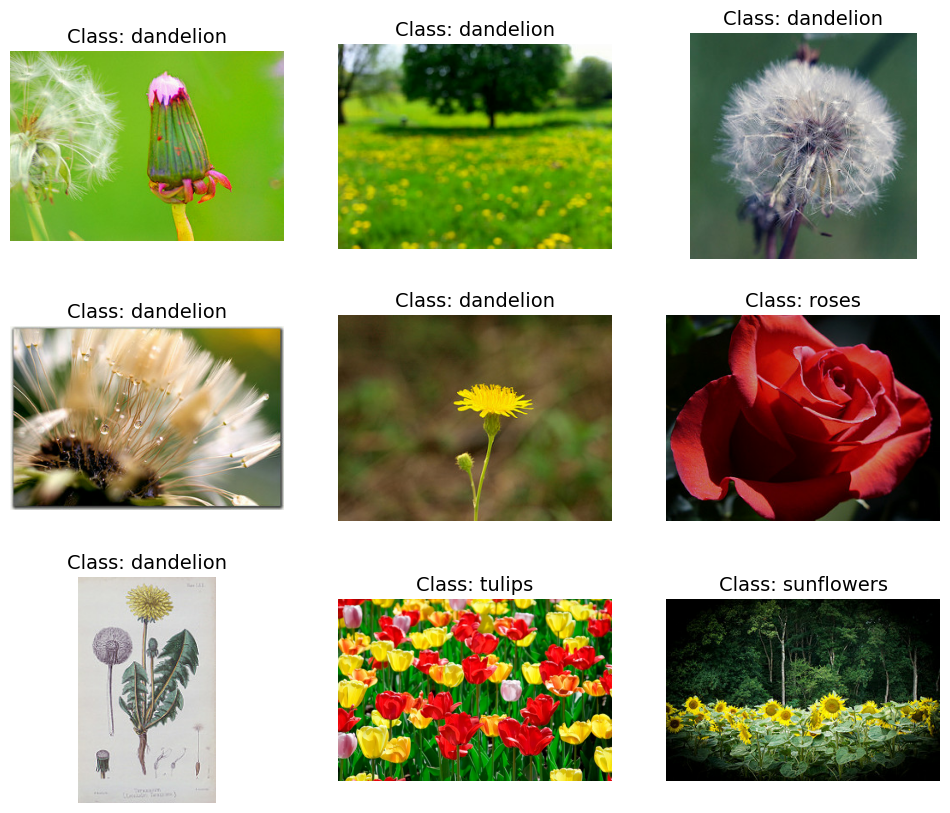

In [14]:
# extra code – displays the first 9 images in the validation set

plt.figure(figsize=(12, 10))
index = 0
for image, label in valid_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")

plt.show()

##### 10c. Build the input pipeline, apply the appropriate preprocessing operations, and optionally add data augmentation.

All three datasets contain individual images. We need to batch them, but for this we first need to ensure they all have the same size, or else batching will not work. We can use a Resizing layer for this. We must also call the tf.keras.applications.xception.preprocess_input() function to preprocess the images appropriately for the Xception model. We will also add shuffling and prefetching to the training dataset.

In [15]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

Let's take a look again at the first 9 images from the validation set: they're all 224x224 now, with values ranging from -1 to 1:

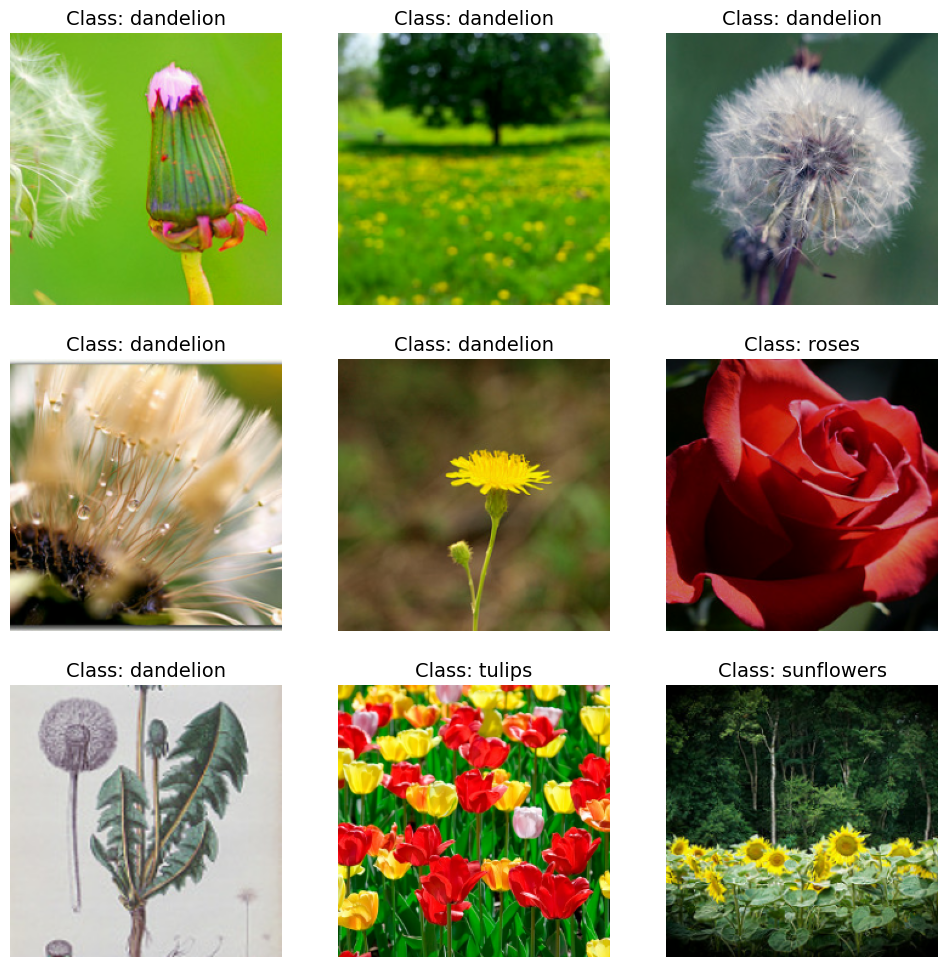

In [16]:
# extra code – displays the first 9 images in the first batch of valid_set

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow((X_batch[index] + 1) / 2)  # rescale to 0–1 for imshow()
        plt.title(f"Class: {class_names[y_batch[index]]}")
        plt.axis("off")

plt.show()

Now let's load the pretrained model, without its top layers, and replace them with our own, for the flower classification task:

In [17]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

##### 10d. Fine-tune a pretrained model on this dataset.

In [18]:
for layer in base_model.layers:
    layer.trainable = False

Let's train the model for a few epochs, while keeping the base model weights fixed:

In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7078 - loss: 0.9185 - val_accuracy: 0.8603 - val_loss: 0.5577
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.9043 - loss: 0.3486 - val_accuracy: 0.8421 - val_loss: 0.6164
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9391 - loss: 0.1864 - val_accuracy: 0.8131 - val_loss: 0.9068


In [20]:
# display name for each layer
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_layer_1          33: block4_pool            66: block8_sepconv1_act    99: block11_sepconv2_act  
  1: block1_conv1           34: batch_normalization_2  67: block8_sepconv1       100: block11_sepconv2      
  2: block1_conv1_bn        35: add_2                  68: block8_sepconv1_bn    101: block11_sepconv2_bn   
  3: block1_conv1_act       36: block5_sepconv1_act    69: block8_sepconv2_act   102: block11_sepconv3_act  
  4: block1_conv2           37: block5_sepconv1        70: block8_sepconv2       103: block11_sepconv3      
  5: block1_conv2_bn        38: block5_sepconv1_bn     71: block8_sepconv2_bn    104: block11_sepconv3_bn   
  6: block1_conv2_act       39: block5_sepconv2_act    72: block8_sepconv3_act   105: add_9                 
  7: block2_sepconv1        40: block5_sepconv2        73: block8_sepconv3       106: block12_sepconv1_act  
  8: block2_sepconv1_bn     41: block5_sepconv2_bn     74: block8_sepconv3_bn    107: block12_sepconv1      
  9: block2_sepconv

Now that the weights of our new top layers are not too bad, we can make the top part of the base model trainable again, and continue training, but with a lower learning rate:

In [21]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 561s 6s/step - accuracy: 0.8632 - loss: 0.4394 - val_accuracy: 0.8875 - val_loss: 0.4968
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 545s 6s/step - accuracy: 0.9851 - loss: 0.0533 - val_accuracy: 0.8966 - val_loss: 0.3434
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 546s 6s/step - accuracy: 0.9930 - loss: 0.0262 - val_accuracy: 0.9147 - val_loss: 0.3479
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 673s 8s/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9129 - val_loss: 0.3155
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1313s 15s/step - accuracy: 0.9968 - loss: 0.0087 - val_accuracy: 0.9020 - val_loss: 0.3785
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 577s 7s/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.9056 - val_loss: 0.3207
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 555s 6s/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9056 - val_loss: 0.3284
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 557s 6s/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9038 -

##### 11. Go through TensorFlow's Style Transfer tutorial (https://homl.info/styletuto. This a fun way to generate art using deep learning)

see C:/Users/pat/OReillyHandsOnMachineLearning/14_exercises_style_transfer.ipynb Notebook for exercise 11